In [76]:
import pandas as pd
import numpy as np
import json
import xmltodict

import seaborn as sns
import matplotlib.pyplot as plt

# Functions

In [77]:
def level_value_and_labels(file_path):
    with open(file_path) as fd:
        doc = xmltodict.parse(fd.read())

    df_xml1 = pd.DataFrame(doc['quiz'])
    df_xml1

    columns_name = df_xml1['question'][0].keys()

    data = []
    subject_xml1_df = pd.DataFrame(data, columns=columns_name)

    for i in range(len(df_xml1)):
        subject_xml1_df.loc[i] = df_xml1['question'][i]

    subject_xml1_df.head(3)

    names = []
    for i in range(len(subject_xml1_df)):
        names.append(subject_xml1_df['name'][i]['text'])

    subject_xml1_df['name'] = names

    level = []
    q_type = []
    for i in range(len(subject_xml1_df)):
        level_object = str(subject_xml1_df['tags'][i]['tag'])

        if('l1' in level_object or 'L1' in level_object):
            level.append('l1')
        elif('l2' in level_object or 'L2' in level_object):
            level.append('l2')
        elif('l3' in level_object or 'L3' in level_object):
            level.append('l3')
        elif('pending' in level_object or 'Pending' in level_object):
            level.append('pending')
        else:
            level.append('reviewing')

        
        if('exam' in level_object or 'Exam' in level_object):
            q_type.append('exam')
        elif('quiz' in level_object or 'Quiz' in level_object):
            q_type.append('quiz')
        elif('pretest' in level_object or 'Pretest' in level_object):
            q_type.append('pretest')
        elif('pending' in level_object or 'Pending' in level_object):
            q_type.append('pending')
        elif('review' in level_object or 'Review' in level_object):
            q_type.append('review')
        else:
            q_type.append(None)

    print(len(level))

    subject_xml1_df['level'] = level
    subject_xml1_df['q_type'] = q_type

    subject_xml1_df = subject_xml1_df[subject_xml1_df['level'] != 'pending']
    subject_xml1_df = subject_xml1_df[subject_xml1_df['level'] != 'reviewing']

    l1 = len(subject_xml1_df[subject_xml1_df['level'] == 'l1'])
    l2 = len(subject_xml1_df[subject_xml1_df['level'] == 'l2'])
    l3 = len(subject_xml1_df[subject_xml1_df['level'] == 'l3'])

    labels = sorted(subject_xml1_df['level'].unique().tolist())
    labels = [labels[0], labels[1], labels[2]]
    labels

    return [[l1,l2,l3], labels]

In [78]:
xml1 = level_value_and_labels('./data_source_xml/1.xml')
print('Subject 1', xml1, '\n')

xml2 = level_value_and_labels('./data_source_xml/2.xml')
print('Subject 2', xml2, '\n')

# xml3 = level_value_and_labels('./data_source_xml/3.xml')
# print('Subject 3', xml3, '\n')

xml4 = level_value_and_labels('./data_source_xml/4.xml')
print('Subject 4', xml4, '\n')

xml5 = level_value_and_labels('./data_source_xml/5.xml')
print('Subject 5', xml5, '\n')

xml6 = level_value_and_labels('./data_source_xml/6.xml')
print('Subject 6', xml6, '\n')

xml7 = level_value_and_labels('./data_source_xml/7.xml')
print('Subject 7', xml7, '\n')

xml8 = level_value_and_labels('./data_source_xml/8.xml')
print('Subject 8', xml8, '\n')

xml9 = level_value_and_labels('./data_source_xml/9.xml')
print('Subject 9', xml9, '\n')

xml10 = level_value_and_labels('./data_source_xml/10.xml')
print('Subject 10', xml10, '\n')

# xml11 = level_value_and_labels('./data_source_xml/11.xml')
# print('Subject 11', xml11, '\n')

xml12 = level_value_and_labels('./data_source_xml/12.xml')
print('Subject 12', xml12, '\n')

112
Subject 1 [[70, 23, 8], ['l1', 'l2', 'l3']] 

16
Subject 2 [[5, 8, 3], ['l1', 'l2', 'l3']] 

46
Subject 4 [[20, 17, 9], ['l1', 'l2', 'l3']] 

83
Subject 5 [[42, 28, 11], ['l1', 'l2', 'l3']] 

70
Subject 6 [[18, 26, 23], ['l1', 'l2', 'l3']] 

62
Subject 7 [[15, 14, 13], ['l1', 'l2', 'l3']] 

51
Subject 8 [[15, 16, 7], ['l1', 'l2', 'l3']] 

50
Subject 9 [[23, 16, 9], ['l1', 'l2', 'l3']] 

70
Subject 10 [[26, 22, 9], ['l1', 'l2', 'l3']] 

37
Subject 12 [[10, 12, 15], ['l1', 'l2', 'l3']] 



## Read XML

In [79]:
with open('./data_source_xml/1.xml') as fd:
    doc = xmltodict.parse(fd.read())

df_xml1 = pd.DataFrame(doc['quiz'])
df_xml1

,question
0,"{'@type': 'ddmarker', 'name': {'text': 'Mainbo..."
1,"{'@type': 'ddwtos', 'name': {'text': 'jc-q18'}..."
2,"{'@type': 'matching', 'name': {'text': 'File E..."
3,"{'@type': 'matching', 'name': {'text': 'Hardwa..."
4,"{'@type': 'matching', 'name': {'text': 'Speed ..."
...,...
107,"{'@type': 'multichoice', 'name': {'text': 'Ope..."
108,"{'@type': 'multichoice', 'name': {'text': 'Ope..."
109,"{'@type': 'multichoice', 'name': {'text': 'RAM..."
110,"{'@type': 'multichoice', 'name': {'text': 'Typ..."


### Create Dataframe from XML file

In [80]:
columns_name = df_xml1['question'][0].keys()
# print(columns_name)

data = []
subject_xml1_df = pd.DataFrame(data, columns=columns_name)
# subject_xml1_df

In [81]:
for i in range(len(df_xml1)):
    subject_xml1_df.loc[i] = df_xml1['question'][i]

# subject_xml1_df.head(3)

### Clean Name

In [82]:
names = []
for i in range(len(subject_xml1_df)):
    names.append(subject_xml1_df['name'][i]['text'])

subject_xml1_df['name'] = names
subject_xml1_df.head(3)

,@type,name,questiontext,generalfeedback,defaultgrade,penalty,hidden,idnumber,correctfeedback,partiallycorrectfeedback,incorrectfeedback,shownumcorrect,file,drag,drop,tags
0,ddmarker,Mainboard-003,"{'@format': 'html', 'text': '1.Question 1'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,"{'@name': 'computer-motherboard-500x500.jpg', ...","[{'no': '1', 'text': 'កន្លែង​ដាក់​ CPU', 'noof...","[{'no': '1', 'shape': 'rectangle', 'coords': '...","{'tag': [{'text': 'exam'}, {'text': 'L2'}, {'t..."
1,ddwtos,jc-q18,"{'@format': 'html', 'text': '1.Question 2'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'L1'}, {'t..."
2,matching,File Extensions-001,"{'@format': 'html', 'text': '1.Question 3'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'l3'}, {'text': 'exam'}, {'t..."


### Add Column Level and QuestionType

In [83]:
level = []
q_type = []
for i in range(len(subject_xml1_df)):
    level_object = str(subject_xml1_df['tags'][i]['tag'])

    if('l1' in level_object or 'L1' in level_object):
        level.append('L1')
    elif('l2' in level_object or 'L2' in level_object):
        level.append('L2')
    elif('l3' in level_object or 'L3' in level_object):
        level.append('L3')
    elif('pending' in level_object or 'Pending' in level_object):
        level.append('pending')
    else:
        level.append('reviewing')

    
    if('exam' in level_object or 'Exam' in level_object):
        q_type.append('exam')
    elif('quiz' in level_object or 'Quiz' in level_object):
        q_type.append('quiz')
    elif('pretest' in level_object or 'Pretest' in level_object):
        q_type.append('pretest')
    elif('pending' in level_object or 'Pending' in level_object):
        q_type.append('pending')
    elif('review' in level_object or 'Review' in level_object):
        q_type.append('review')
    else:
        q_type.append(None)

print(len(level))

subject_xml1_df['level'] = level
subject_xml1_df['q_type'] = q_type

# subject_xml1_df.to_excel('xml1.xlsx')
# subject_xml1_df.head(3)

112


### Get dataframe where levels are not pending and reviewing

In [84]:
subject_xml1_df = subject_xml1_df[subject_xml1_df['level'] != 'pending']
subject_xml1_df = subject_xml1_df[subject_xml1_df['level'] != 'reviewing']

In [85]:
l1 = len(subject_xml1_df[subject_xml1_df['level'] == 'L1'])
l2 = len(subject_xml1_df[subject_xml1_df['level'] == 'L2'])
l3 = len(subject_xml1_df[subject_xml1_df['level'] == 'L3'])
# pending = len(subject_xml1_df[subject_xml1_df['level'] == 'pending'])
# review = len(subject_xml1_df[subject_xml1_df['level'] == 'reviewing'])
print([l1,l2,l3])

labels = sorted(subject_xml1_df['level'].unique().tolist())
labels = [labels[0], labels[1], labels[2]]
print(labels)

[70, 23, 8]
['L1', 'L2', 'L3']


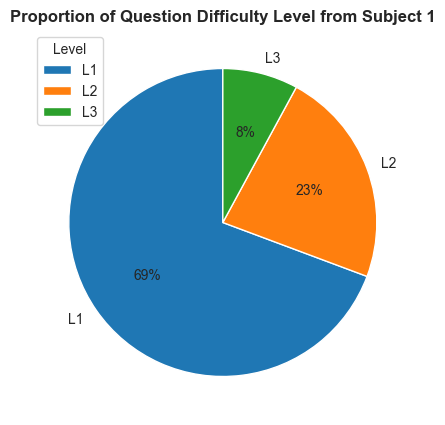

In [86]:
# Create an array of values
# values = [l2, l1, l3, pending, review]
values = [l1, l2, l3]

# Create a list of labels
labels = labels

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)

# Set the title
plt.title("Proportion of Question Difficulty Level from Subject 1", fontweight='bold')

# Set the legend
plt.legend(title="Level", loc='upper left')

# Show the chart
plt.show()

## Read QuestionStats

In [87]:
df_q_state = pd.read_excel('./data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់/DSE-EXAM-ERA5-Senate-វិញ្ញាសាប្រឡង-questionstats.xlsx', sheet_name=1)
df_q_state.columns = df_q_state.columns.str.lower()
df_q_state.head(3)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81%,49.10%,NaN,1.00%,0.96%,24.23%,29.61%
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99%,49.05%,NaN,1.00%,0.98%,25.71%,31.29%
2,3.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,54.70%,49.33%,NaN,1.00%,1.01%,27.04%,32.48%


In [88]:

facility_index_rate = []
for facility_index in df_q_state['facility index']:
    facility_index = facility_index[:-1]
    # print(facility_index)
    facility_index_rate.append(float(facility_index))

df_q_state['facility index'] = facility_index_rate
df_q_state.head(3)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81,49.10%,NaN,1.00%,0.96%,24.23%,29.61%
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99,49.05%,NaN,1.00%,0.98%,25.71%,31.29%
2,3.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,54.70,49.33%,NaN,1.00%,1.01%,27.04%,32.48%


In [89]:
df_q_state.loc[df_q_state['facility index'] <= float(60), 'label_facility_index'] = 'L3'
df_q_state.loc[(df_q_state['facility index'] > float(60)) & (df_q_state['facility index'] <= float(80)), 'label_facility_index'] = 'L2'
df_q_state.loc[(df_q_state['facility index'] > float(80)) & (df_q_state['facility index'] <= float(100)), 'label_facility_index'] = 'L1'

df_q_state.head(3)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency,label_facility_index
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81,49.10%,NaN,1.00%,0.96%,24.23%,29.61%,L3
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99,49.05%,NaN,1.00%,0.98%,25.71%,31.29%,L3
2,3.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,54.70,49.33%,NaN,1.00%,1.01%,27.04%,32.48%,L3


In [90]:
l1 = len(df_q_state[df_q_state['label_facility_index'] == 'L1'])
l2 = len(df_q_state[df_q_state['label_facility_index'] == 'L2'])
l3 = len(df_q_state[df_q_state['label_facility_index'] == 'L3'])

In [91]:
labels = df_q_state['label_facility_index'].unique().tolist()
labels

['L3', 'L2', 'L1']

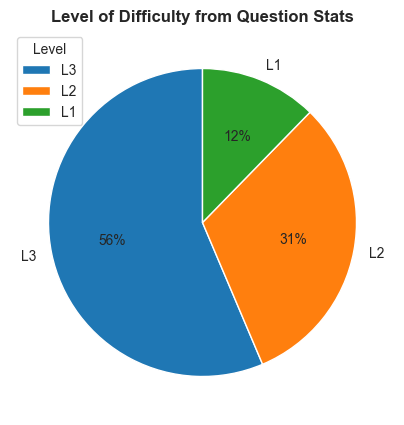

In [92]:
# Create an array of values
values = [l3, l2, l1]

# Create a list of labels
labels = labels

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)
# plt.pie(values, labels=labels)

# Set the title
plt.title('Level of Difficulty from Question Stats', fontweight='bold')

# Set the legend
plt.legend(title="Level", loc='upper left')

# Show the chart
plt.show()
